## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/laptops.csv', encoding='latin-1')


In [3]:
data.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
data.drop('Unnamed: 0' ,axis=1 ,inplace=True)

In [6]:
data['Ram'] = data['Ram'].str.replace('GB' ,'')
data['Weight'] = data['Weight'].str.replace('kg', '')


In [7]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

## Target Variable (i.e Price)

In [8]:
data['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

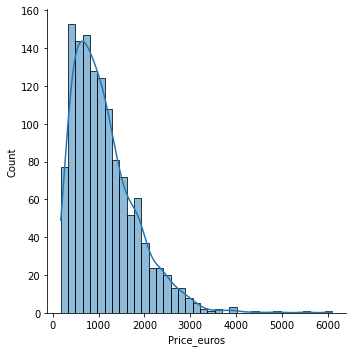

In [9]:
sns.displot(data['Price_euros'] ,kde=True)

## Handling Missing Values

In [10]:
data.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

<AxesSubplot:>

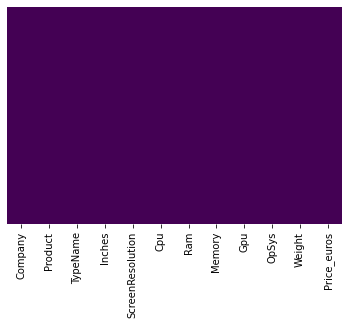

In [11]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

# EDA / Data Cleaning

## Analysing Company

In [12]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

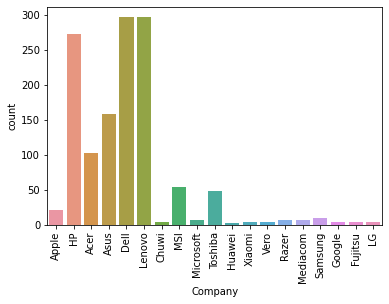

In [13]:
sns.countplot(x =data['Company'] ,data=data)
plt.xticks(rotation=90)
plt.show()

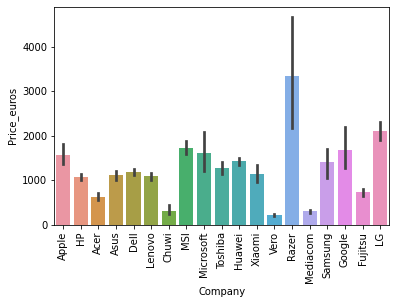

In [14]:
sns.barplot(x=data['Company'], y=data['Price_euros'])
plt.xticks(rotation=90)
plt.show()

## Analysing TypeName

In [15]:
data['TypeName'].value_counts()


Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

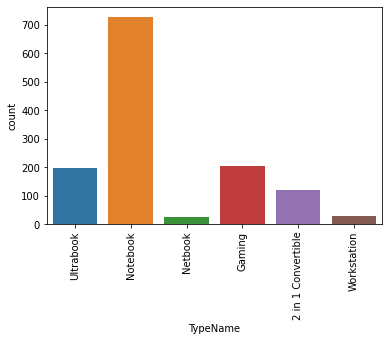

In [16]:
sns.countplot(x=data['TypeName'] ,data=data)
plt.xticks(rotation=90)
plt.show()

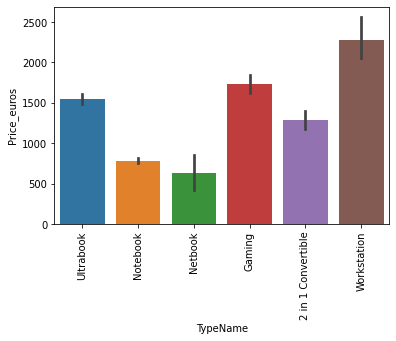

In [17]:
sns.barplot(x=data['TypeName'], y=data['Price_euros'])
plt.xticks(rotation=90)
plt.show()

## Analysing Inches

In [18]:
data['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

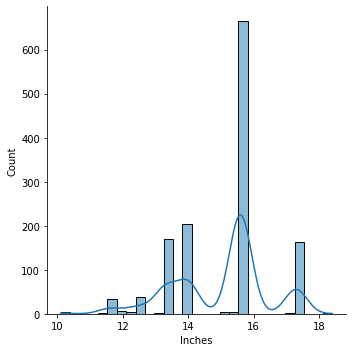

In [19]:
sns.displot(data['Inches'] ,kde=True)

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

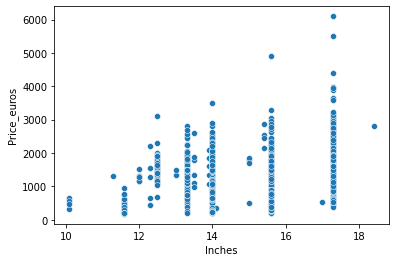

In [20]:
sns.scatterplot(x=data['Inches'] ,y=data['Price_euros'])

## Analysing Screen-Resolution (creating new features)

In [21]:
data['ScreenResolution'].value_counts()[:20]

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Touchscreen

In [22]:
data['touchScreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


<AxesSubplot:>

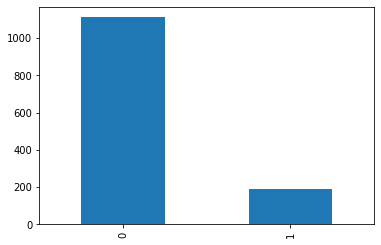

In [23]:
data['touchScreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='touchScreen', ylabel='Price_euros'>

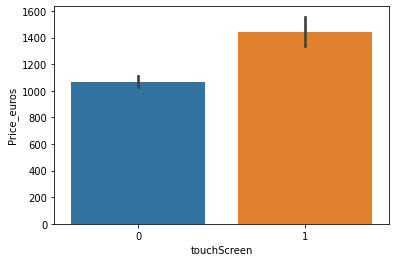

In [24]:
sns.barplot(x=data['touchScreen'], y=data['Price_euros'])

### IPS

In [25]:
data['IPS'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<AxesSubplot:>

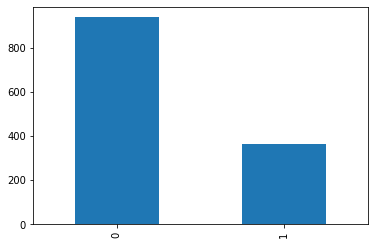

In [26]:
data['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

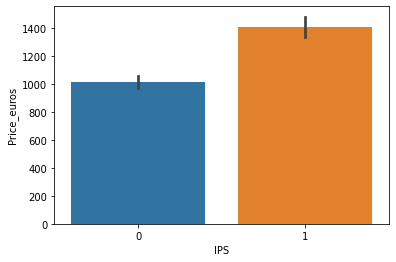

In [27]:
sns.barplot(x=data['IPS'], y=data['Price_euros'])

### Xresolution & Yresolution

In [28]:
data_ = data['ScreenResolution'].str.split('x',n=1 ,expand=True)
data['Xresolution'] = data_[0]
data['Yresolution'] = data_[1]

In [29]:
data['Xresolution'] = data['Xresolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

data['Xresolution'] = data['Xresolution'].astype('int')
data['Yresolution'] = data['Yresolution'].astype('int')

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touchScreen,IPS,Xresolution,Yresolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [30]:
data['PPI'] = (np.sqrt((data['Xresolution']**2) + (data['Yresolution']**2))/data['Inches']).astype('float')

data.drop(columns=['ScreenResolution'],axis=1 ,inplace=True)

### Checking Correlation

In [31]:
data.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.743007
Xresolution    0.556529
Yresolution    0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
touchScreen    0.191226
Inches         0.068197
Name: Price_euros, dtype: float64

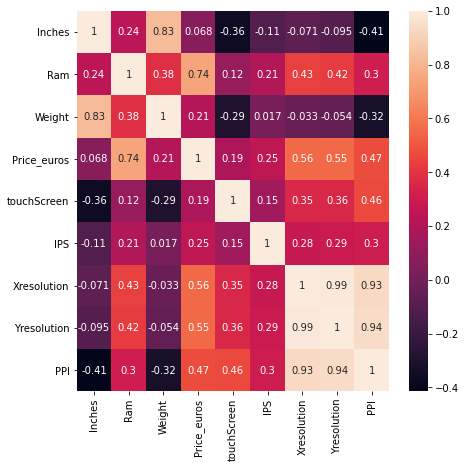

In [32]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr() ,annot=True)
plt.show()

In [33]:
data.drop(columns=['Inches', 'Xresolution', 'Yresolution'], axis=1 ,inplace=True)
data.columns

Index(['Company', 'Product', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'touchScreen', 'IPS', 'PPI'],
      dtype='object')

## Analysing CPU (creating new features)

In [34]:
data['Cpu'].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: Cpu, dtype: object

In [35]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

### CPU Name

In [36]:
data['CPU name'] = data['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

### CPU processor

In [37]:
def get_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else: 
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else: 
            return 'AMD processor'

data['CPU processor'] = data['CPU name'].apply(get_processor)

In [38]:
data.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touchScreen,IPS,PPI,CPU name,CPU processor
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


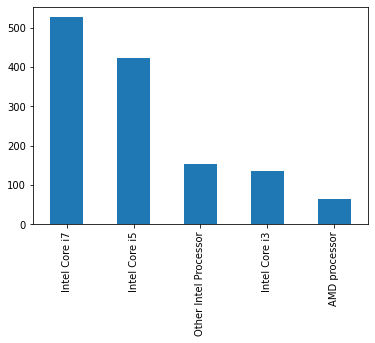

In [39]:
data['CPU processor'].value_counts().plot(kind='bar')
plt.show()

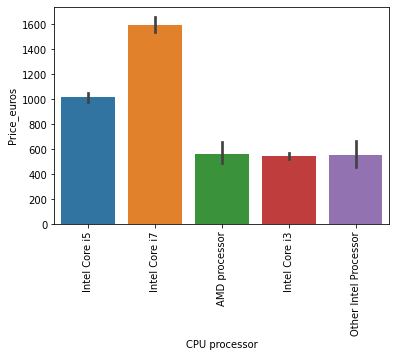

In [40]:
sns.barplot(x=data['CPU processor'], y=data['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [41]:
data.drop(columns=['Cpu' ,'CPU name'] ,axis=1,inplace=True)
data.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price_euros', 'touchScreen', 'IPS', 'PPI', 'CPU processor'],
      dtype='object')

## Analysing RAM 

In [42]:
data['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

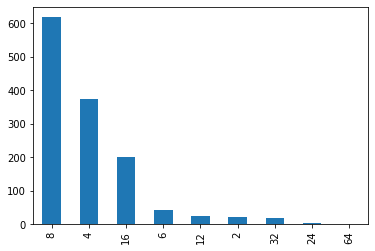

In [43]:
data['Ram'].value_counts().plot(kind='bar')
plt.show()

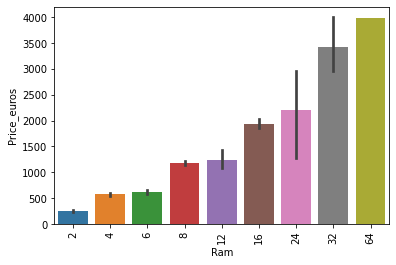

In [44]:
sns.barplot(x=data['Ram'] ,y=data['Price_euros'])
plt.xticks(rotation=90)
plt.show()

## Analysing Memory 

In [45]:
data['Memory'].value_counts()[:30]

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [46]:
data['Memory'] = data['Memory'].astype(str).replace('\.0' ,'' ,regex=True)
# 256GB to 256
data["Memory"] = data["Memory"].str.replace('GB', '')
# 1TB to 1000
data["Memory"] = data["Memory"].str.replace('TB', '000')

data_ = data['Memory'].str.split('+' ,n=1 ,expand=True)

data['first'] = data_[0]
data['first'] = data['first'].str.strip()

data['second'] = data_[1] 


# first part 
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace=True)

# second part 
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"] = (data["first"]*data["Layer1HDD"] + data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"] + data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"] + data["second"]*data["Layer2Hybrid"])

data["Flash_Storage"] = (data["first"]*data["Layer1Flash_Storage"] +data["second"]*data["Layer2Flash_Storage"])

# Dropping the unecessary columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
'Layer2Flash_Storage'], inplace=True)


In [47]:
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touchScreen,IPS,PPI,CPU processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [48]:
data.corr()['Price_euros'].sort_values(ascending=False)

Price_euros      1.000000
Ram              0.743007
SSD              0.670799
PPI              0.473487
IPS              0.252208
Weight           0.210370
touchScreen      0.191226
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Name: Price_euros, dtype: float64

In [49]:
data.drop(columns=['Memory','Hybrid', 'Flash_Storage'],inplace=True)

In [50]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'touchScreen', 'IPS', 'PPI', 'CPU processor', 'HDD',
       'SSD'],
      dtype='object')

## Analysing GPU

In [51]:
data['Gpu'].head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: Gpu, dtype: object

In [52]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [53]:
data['GPU brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data['GPU brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU brand, dtype: int64

In [54]:
data = data[data['GPU brand']!= 'ARM']
data['GPU brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU brand, dtype: int64

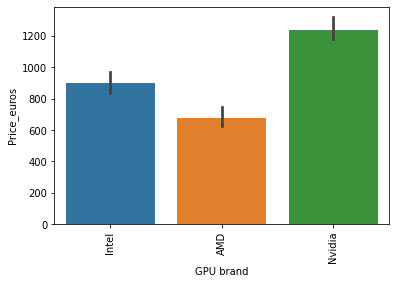

In [55]:
sns.barplot(x=data['GPU brand'], y=data['Price_euros'], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

In [56]:
data.drop(columns=['Gpu'] ,inplace=True)

## Analysing OpSys

In [57]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

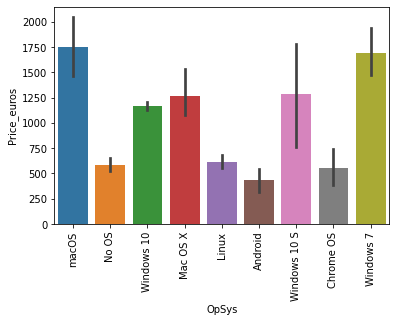

In [58]:
sns.barplot(x=data['OpSys'], y=data['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [59]:
def os_grouping(text):
    if text =='Windows 10' or text =='Windows 10 S' or text =='Windows 7':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/Linux'

data['OS'] = data['OpSys'].apply(os_grouping)
data.drop(columns=['OpSys'], inplace=True)

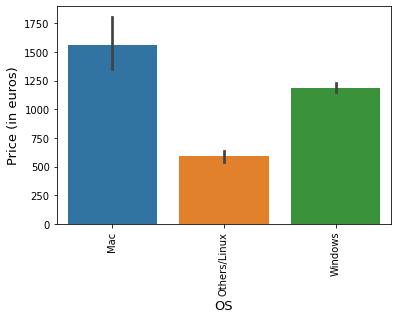

In [60]:
sns.barplot(x=data['OS'], y=data['Price_euros'])
plt.xticks(rotation=90)
plt.xlabel('OS' ,fontsize=13)
plt.ylabel('Price (in euros)',fontsize=13)
plt.show()


## Analysing Weight

In [61]:
data['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: Weight, Length: 171, dtype: int64

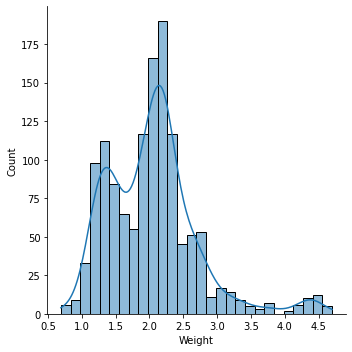

In [62]:
sns.displot(data['Weight'] ,kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

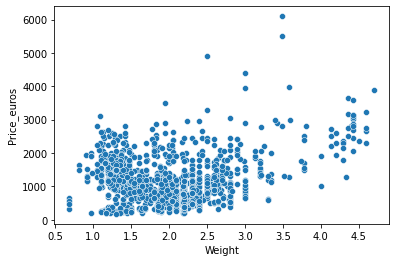

In [63]:
sns.scatterplot(x=data['Weight'], y=data['Price_euros'])

### Checking Correlation

In [64]:
data.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.742905
SSD            0.670660
PPI            0.475368
IPS            0.253320
Weight         0.209867
touchScreen    0.192917
HDD           -0.096891
Name: Price_euros, dtype: float64

## Handling Skewness (shape of distribution of values)

Skewness :  1.519750399431897


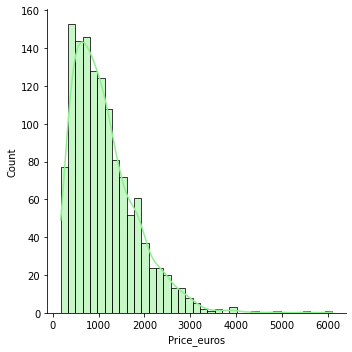

In [65]:
print('Skewness : ',data.Price_euros.skew())
sns.displot(data.Price_euros, kde=True,color='lightgreen')

Skewness (after log-transforming) :  -0.17528027569556753


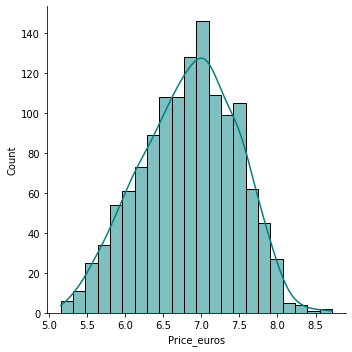

In [66]:
target = np.log(data.Price_euros)
print('Skewness (after log-transforming) : ', target.skew())
sns.displot(target, kde=True, color='teal')

# Model Building

In [67]:
data = data.drop(columns=['Product'])

In [68]:
X = data.drop(columns=['Price_euros'])
y = target

X.shape ,y.shape

((1302, 12), (1302,))

In [69]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((1041, 12), (1041,), (261, 12), (261,))

In [70]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score ,mean_absolute_error

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

step1 = ColumnTransformer(transformers=[('col_tnf' ,OneHotEncoder(sparse=False ,drop='first'),[0,1,7,10,11])] ,remainder='passthrough')

step2 = LinearRegression()

pipeline = Pipeline([
    ('step1' ,step1),
    ('step2' ,step2)
])

pipeline.fit(X_train ,y_train)
y_predict_linear = pipeline.predict(X_test)

In [72]:
print('R2 Score : ',r2_score(y_test ,y_predict_linear))
print('MAE : ', mean_absolute_error(y_test, y_predict_linear))

R2 Score :  0.8081332011067057
MAE :  0.21461354296079732


## Ridge Regression 

In [73]:
from sklearn.linear_model import Ridge

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(
    sparse=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')

step2 = Ridge()

pipeline = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipeline.fit(X_train, y_train)
y_predict_ridge = pipeline.predict(X_test)


In [74]:
print('R2 Score : ', r2_score(y_test, y_predict_ridge))
print('MAE : ', mean_absolute_error(y_test, y_predict_ridge))

R2 Score :  0.8084899200931159
MAE :  0.21474278545800038


## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(
    sparse=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipeline = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipeline.fit(X_train, y_train)
y_predict_lasso = pipeline.predict(X_test)


In [76]:
print('R2 Score : ', r2_score(y_test, y_predict_lasso))
print('MAE : ', mean_absolute_error(y_test, y_predict_lasso))

R2 Score :  0.8056423346263875
MAE :  0.21696654985400207


## KNN

In [77]:
from sklearn.neighbors import KNeighborsRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_knn = pipe.predict(X_test)

In [78]:
print('R2 score', r2_score(y_test, y_predict_knn))
print('MAE', mean_absolute_error(y_test, y_predict_knn))

R2 score 0.7634911060613176
MAE 0.22742870555164285


## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_dt = pipe.predict(X_test)

In [80]:
print('R2 score', r2_score(y_test, y_predict_dt))
print('MAE', mean_absolute_error(y_test, y_predict_dt))

R2 score 0.827791631668363
MAE 0.19673499780505063


## SVM

In [81]:
from sklearn.svm import SVR

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_svr = pipe.predict(X_test)

In [82]:
print('R2 score', r2_score(y_test, y_predict_svr))
print('MAE', mean_absolute_error(y_test, y_predict_svr))

R2 score 0.8238019233735441
MAE 0.1961787053563799


## Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_rfr = pipe.predict(X_test)

In [84]:
print('R2 score', r2_score(y_test, y_predict_rfr))
print('MAE', mean_absolute_error(y_test, y_predict_rfr))

R2 score 0.8610915161736313
MAE 0.17709600827833902


## AdaBoost 

In [85]:
from sklearn.ensemble import AdaBoostRegressor 

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_ada = pipe.predict(X_test)

In [86]:
print('R2 score', r2_score(y_test, y_predict_ada))
print('MAE', mean_absolute_error(y_test, y_predict_ada))

R2 score 0.767441096641561
MAE 0.24564211076285047


## Gradient Boost

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_predict_grad = pipe.predict(X_test)

In [88]:
print('R2 score', r2_score(y_test, y_predict_grad))
print('MAE', mean_absolute_error(y_test, y_predict_grad))

R2 score 0.8725266976127735
MAE 0.1667570241121869


# Model Evaluation

In [89]:
models = pd.DataFrame({
    'Regression Model': ['Linear Regression','RidgeRegression', 'LassoRegression', 'KNN','Decision Tree','SVM' ,'Random Forest' ,'AdaBoost' ,'Gradient-Boost'],
    'MAE Score': [
        mean_absolute_error(y_test, y_predict_linear),
        mean_absolute_error(y_test, y_predict_ridge),
        mean_absolute_error(y_test, y_predict_lasso),
        mean_absolute_error(y_test, y_predict_knn),
        mean_absolute_error(y_test, y_predict_dt),
        mean_absolute_error(y_test, y_predict_svr),
        mean_absolute_error(y_test, y_predict_rfr),
        mean_absolute_error(y_test, y_predict_ada),
        mean_absolute_error(y_test, y_predict_grad)
        ],

    'R2 Score': [
        r2_score(y_test, y_predict_linear),
        r2_score(y_test, y_predict_ridge),
        r2_score(y_test, y_predict_lasso),
        r2_score(y_test, y_predict_knn),
        r2_score(y_test, y_predict_dt),
        r2_score(y_test, y_predict_svr),
        r2_score(y_test, y_predict_rfr),
        r2_score(y_test, y_predict_ada),
        r2_score(y_test, y_predict_grad)
    ]
    })

models.sort_values(by='R2 Score', ascending=False)

,Regression Model,MAE Score,R2 Score
8,Gradient-Boost,0.166757,0.872527
6,Random Forest,0.177096,0.861092
4,Decision Tree,0.196735,0.827792
5,SVM,0.196179,0.823802
1,RidgeRegression,0.214743,0.808490
0,Linear Regression,0.214614,0.808133
2,LassoRegression,0.216967,0.805642
7,AdaBoost,0.245642,0.767441
3,KNN,0.227429,0.763491
